<a id="ref2"></a>

# Preproccessing Data

<a id="ref2"></a>

## Load Data

In [1]:
!git clone -l -s https://github.com/rendigeka/dataset.git cloned-repo
%cd cloned-repo
!ls

fatal: destination path 'cloned-repo' already exists and is not an empty directory.
/content/cloned-repo
id-28g.csv


In [2]:
# load data
import numpy as np
import pandas as pd
dtid = pd.read_csv('/content/cloned-repo/id-28g.csv')

# set y: label, x: pixel
dtf = pd.DataFrame(dtid)
y = np.array(dtf['y'])
x = np.array(dtf.iloc[0:, 1:])

# split data 80% train 20% test
nx = int(len(y) - (len(y) * 0.2))
x_train = x[0:nx]
y_train = y[0:nx]
x_test = x[nx:]
y_test = y[nx:]

types = {   
    '0': 'Angka 0',
    '1': 'Angka 1',
    '2': 'Angka 2',
    '3': 'Angka 3',
    '4': 'Angka 4',
    '5': 'Angka 5',
    '6': 'Angka 6',
    '7': 'Angka 7',
    '8': 'Angka 8',
    '9': 'Angka 9'
}

dtf.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,...,x745,x746,x747,x748,x749,x750,x751,x752,x753,x754,x755,x756,x757,x758,x759,x760,x761,x762,x763,x764,x765,x766,x767,x768,x769,x770,x771,x772,x773,x774,x775,x776,x777,x778,x779,x780,x781,x782,x783,x784
0,3,192,187,185,184,182,182,182,181,179,179,178,178,178,179,179,178,177,176,175,174,174,175,177,179,180,181,183,185,189,184,181,179,177,174,173,171,168,167,167,...,69,69,68,68,70,76,84,93,103,114,127,141,159,148,136,128,121,116,112,108,107,106,106,107,105,104,102,101,101,101,101,101,103,108,115,122,130,139,149,158
1,5,189,187,186,184,181,180,180,180,178,175,174,173,172,169,169,169,169,169,170,171,173,175,177,179,181,184,187,189,187,185,181,176,171,167,165,163,161,158,156,...,82,82,84,88,93,100,107,116,127,139,151,161,149,144,138,132,127,123,120,116,114,112,111,110,109,108,109,109,109,110,112,115,121,127,133,139,148,157,166,173
2,7,193,191,187,183,180,178,175,172,170,170,171,173,175,175,176,177,177,177,177,177,176,178,180,183,185,189,191,196,187,183,177,172,167,162,157,152,149,148,148,...,149,160,173,186,195,201,203,203,203,203,203,202,191,191,188,186,185,186,185,184,179,170,161,154,153,153,155,159,166,174,183,191,198,202,202,202,202,203,203,201
3,3,189,186,180,175,170,168,168,167,167,167,168,169,169,169,169,168,168,167,167,168,170,172,173,176,180,185,189,192,176,169,161,153,147,143,141,140,139,139,138,...,100,99,100,101,103,105,112,120,129,139,147,155,175,167,160,154,150,147,143,141,139,139,139,138,137,136,135,133,132,132,132,134,136,137,141,148,155,161,167,172
4,0,194,189,185,181,177,174,171,169,167,165,166,167,167,166,164,164,163,163,164,167,169,171,174,179,184,189,194,196,181,174,167,159,153,148,144,140,137,135,134,...,114,113,114,117,120,124,131,139,148,157,165,172,184,178,172,167,162,159,157,156,154,152,150,149,148,148,148,146,145,144,146,149,152,156,161,167,173,179,184,188


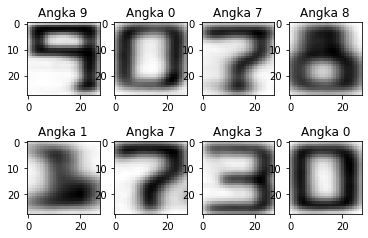

In [3]:
# Show images and labels
import matplotlib.pyplot as plt
f, axes = plt.subplots(2, 4)
for row in axes:
    for axe in row:
        index = np.random.randint(len(x_train))
        img = np.array(x_train[index]).reshape((28, 28))
        obj = y_train[index]
        axe.imshow(img, cmap='gray')
        axe.set_title(types[str(y_train[index])])

<a id="ref2"></a>

# Training Data

<a id="ref2"></a>

## Split Data 

In [4]:
# Split into a training and testing set
x_train = x_train.reshape(len(x_train), 28,28)
x_test = x_test.reshape(len(x_test), 28,28)

print(x_train.shape)

(3264, 28, 28)


In [5]:
# Data train dan test

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


print('x_train.shape ', x_train.shape)
print('banyak gambar di x_train ', x_train.shape[0])
print('banyak gambar di x_test ', x_test.shape[0])


x_train.shape  (3264, 28, 28, 1)
banyak gambar di x_train  3264
banyak gambar di x_test  816


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, InputLayer, AveragePooling2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam

model = Sequential()

model.add(InputLayer(input_shape=(28, 28, 1)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 32, kernel_size = (5,5), 
                 activation ='relu', padding = 'Same'))
model.add(Conv2D(filters = 32, kernel_size = (5,5), 
                 activation ='relu', padding = 'Same'))

model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), 
                 activation ='relu', padding = 'Same'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), 
                 activation ='relu', padding = 'Same'))

model.add(AveragePooling2D(pool_size=(2, 2), 
                           strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(10, activation = "softmax"))

model.summary()

Using TensorFlow backend.














Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        1849

<a id="ref2"></a>

## Train (Fitting)

In [7]:
# Optimasi NN
# Compiling and fitting the model

adam = Adam(lr=0.001)

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
import time
start = time.time()
history = model.fit(x_train,
                  y_train,
                  validation_split=0.5,
                  epochs=10,
                  verbose=1, 
                  batch_size=128)

model.evaluate(x_test, y_test)
print("Training time :", time.time() - start, "s")




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1632 samples, validate on 1632 samples
Epoch 1/10
1632/1632 [==============================] - 6s 3ms/step - loss: 1.2640 - acc: 0.5993 - val_loss: 0.1433 - val_acc: 0.9608
Epoch 2/10
1632/1632 [==============================] - 1s 333us/step - loss: 0.1400 - acc: 0.9651 - val_loss: 0.0241 - val_acc: 0.9945
Epoch 3/10
1632/1632 [==============================] - 1s 313us/step - loss: 0.0512 - acc: 0.9847 - val_loss: 0.0100 - val_acc: 0.9994
Epoch 4/10
1632/1632 [==============================] - 1s 326us/step - loss: 0.0232 - acc: 0.9933 - val_loss: 0.0029 - val_acc: 1.0000
Epoch 5/10
1632/1632 [==============================] - 1s 330us/step - loss: 0.0065 - acc: 0.9982 - val_loss: 0.0030 - val_acc: 0.9988
Epoch 6/10
1632/1632 [==============================] - 0s 301us/step - loss: 0.0063 - acc: 0.9975 - val_loss: 7.7094e-04 - val_acc: 1.0000
Epoch 7/10
1632/1632 [==============

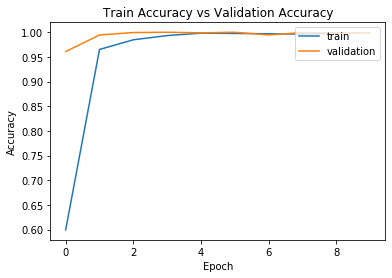

In [8]:
# Plot
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper right')
# plt.savefig('acc_plot.png')
plt.show()

<a id="ref2"></a>
# Evaluasi Data 
## (Confusion Matrix, Accuracy, Visualisasi)

In [9]:
#Testing

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
total_test = len(x_test)
correct_prediction = 0

y_true = []
y_pred = []

for i in range (len(x_test)):
  predict = model.predict(x_test[i].reshape(1, 28, 28, 1))
  # print (predict)
  
  label = y_test[i]
  prediction = predict.argmax(axis=-1)
  print ('Original label:' + str(label))
  print ('Original prediction:' + str(prediction) + '\n')
#   print ('Original prediction Label:' + str(types[prediction]) + '\n')

  y_true.append(label)
  y_pred.append(prediction)
  
  if prediction[0] == label:
    correct_prediction +=1
    

Original label:7
Original prediction:[7]

Original label:4
Original prediction:[4]

Original label:7
Original prediction:[7]

Original label:1
Original prediction:[1]

Original label:0
Original prediction:[0]

Original label:4
Original prediction:[4]

Original label:1
Original prediction:[1]

Original label:1
Original prediction:[1]

Original label:1
Original prediction:[1]

Original label:2
Original prediction:[2]

Original label:7
Original prediction:[7]

Original label:1
Original prediction:[1]

Original label:0
Original prediction:[0]

Original label:0
Original prediction:[0]

Original label:0
Original prediction:[0]

Original label:1
Original prediction:[1]

Original label:3
Original prediction:[3]

Original label:5
Original prediction:[5]

Original label:2
Original prediction:[2]

Original label:2
Original prediction:[2]

Original label:2
Original prediction:[2]

Original label:4
Original prediction:[4]

Original label:0
Original prediction:[0]

Original label:4
Original predicti

In [10]:
print('Total correct prediction = ' +str(correct_prediction))
print('Total incorrect prediction = ' +str(total_test - correct_prediction)+'\n')
print('Accuracy = ', accuracy_score(y_true, y_pred))
print('Classification report:\n', classification_report(y_true, y_pred))
print('Confusion matrix:\n' , confusion_matrix(y_true, y_pred))

Total correct prediction = 816
Total incorrect prediction = 0

Accuracy =  1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       111
           2       1.00      1.00      1.00        83
           3       1.00      1.00      1.00        82
           4       1.00      1.00      1.00        55
           5       1.00      1.00      1.00        41
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        61
           8       1.00      1.00      1.00        41
           9       1.00      1.00      1.00        45

    accuracy                           1.00       816
   macro avg       1.00      1.00      1.00       816
weighted avg       1.00      1.00      1.00       816

Confusion matrix:
 [[261   0   0   0   0   0   0   0   0   0]
 [  0 111   0   0   0   0   0   0   0   0]
 [  0   0  83   0   0   0   0   0